In [53]:
# 读取probs reusuls
# 读取对应的question以及responses
import pandas as pd
df = pd.read_parquet("./results/sub_1000_openr1_Qwen-Math-7B_acc.parquet")

In [54]:
df.index = list(range(len(df)))

In [55]:
df.head()

,data_source,prompt,target,ability,reward_model,extra_info,accs,answers
0,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Alright, let's tackle th...",,"{'ground_truth': '0', 'style': 'rule'}","{'index': -1, 'split': 'default'}",1.000,"[{'correctness': True, 'generated_text': ' The..."
1,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Okay, so I need to find ...",,"{'ground_truth': '45', 'style': 'rule'}","{'index': -1, 'split': 'default'}",0.875,"[{'correctness': True, 'generated_text': ' Th..."
2,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Okay, let's see. I need ...",,"{'ground_truth': '5', 'style': 'rule'}","{'index': -1, 'split': 'default'}",1.000,"[{'correctness': True, 'generated_text': ' No..."
3,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Alright, let's tackle th...",,"{'ground_truth': '0.75', 'style': 'rule'}","{'index': -1, 'split': 'default'}",0.125,"[{'correctness': False, 'generated_text': ' N..."
4,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Okay, let's see. So the ...",,"{'ground_truth': '34', 'style': 'rule'}","{'index': -1, 'split': 'default'}",0.000,"[{'correctness': False, 'generated_text': ' T..."


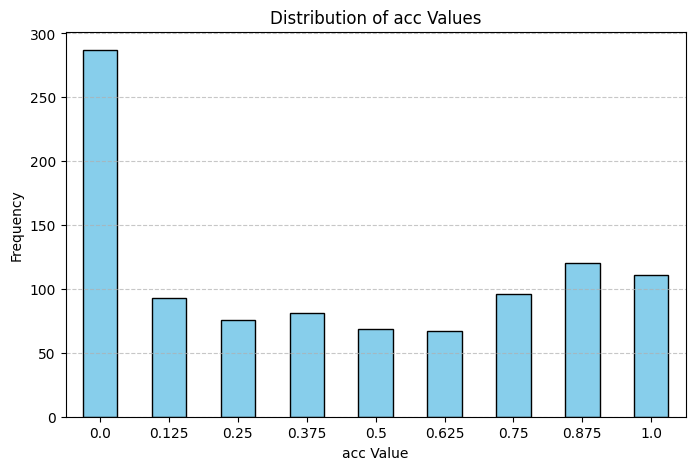

In [56]:
# 看看 acc 的分布

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 提取'acc'列
acc_data = df['accs']

# 绘制分布图
plt.figure(figsize=(8, 5))

# 对于少量离散值，使用条形图更合适
value_counts = acc_data.value_counts().sort_index()
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of acc Values')
plt.xlabel('acc Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [63]:
# all samples
indexes = range(len(df))

# hard samples
sub_df = df[df['accs'] == 0]
sub_df = df[(df['accs'] >= 1/8) & (df['accs'] <= 5/8)]
#sub_df = df[df['accs'] >= 6/8]

indexes = sub_df.index.tolist()

[0.7150259067357513, 0.16839378238341968, 0.15025906735751296, 0.16062176165803108, 0.15284974093264247, 0.19170984455958548, 0.19170984455958548, 0.17357512953367876]


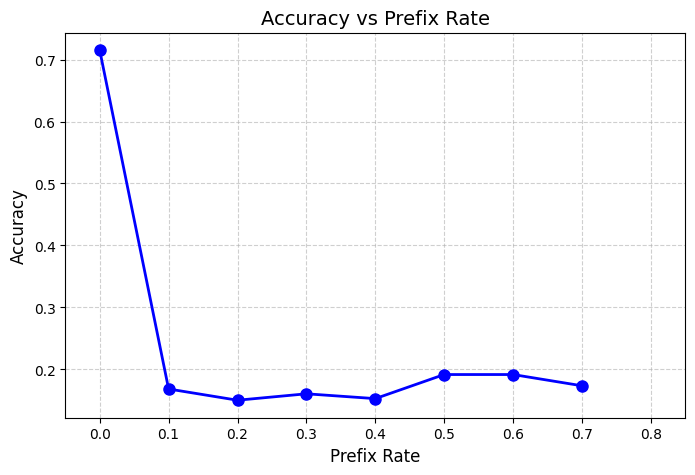

In [64]:
# 整体上看添加 prefix 是有害的
import numpy as np
import json

prefix_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data

# 指定prefix_rate下，指定indexes的样本的
def obtain_prefix_avg_acc(prefix_rate, indexes):
    prefix_file = f"./prefix_results/prefix_{str(prefix_rate)}.jsonl"
    data = np.array(read_jsonl(prefix_file))
    sub_data = data[indexes]
    
    avg_acc = sum([item['correctness'] for item in sub_data])/len(indexes)

    return avg_acc

accs = []
for rate in prefix_rate:
    acc = obtain_prefix_avg_acc(rate, indexes)
    accs.append(acc)

# 创建图形
plt.figure(figsize=(8, 5))

# 绘制折线图
print(accs)
plt.plot(prefix_rate, accs, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# 添加标题和标签
plt.title('Accuracy vs Prefix Rate', fontsize=14)
plt.xlabel('Prefix Rate', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# 设置网格
plt.grid(True, linestyle='--', alpha=0.6)

# 调整坐标轴范围
plt.xlim(-0.05, 0.85)
#plt.ylim(0.14, 0.32)

# 显示图形
plt.show()